# The Project of Unsupervised machine Learning

**The Wholesale Customers Dataset by using Unsupervised Learning**

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Introduction**

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units on diverse product categories.

The goal is to use KMeans clustering technique to segment customers. Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Thus, there is no outcome to be predicted, and the algorithm just tries to find patterns in the data

**Variables**
1. FRESH: annual spending (m.u.) on fresh products (Continuous)
2. MILK: annual spending (m.u.) on milk products (Continuous)
3. GROCERY: annual spending (m.u.)on grocery products (Continuous)
4. FROZEN: annual spending (m.u.)on frozen products (Continuous)
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7. CHANNEL: customer Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal) (Horeca 298 observations)
8. REGION: customer Region: Lisbon, Oporto or Other (Nominal) (Lisbon, 77 observations, Oporto 47 , Other 316)

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Importing Libraries**

In [21]:
# Importing the Libraries
import numpy as np 
import pandas as pd 

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

**Exploring Data**

In [22]:
# Load dataset and make DataFrame

df = pd.read_csv('Wholesale_customers_data[1].csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


**Wholesale customers has 440 samples with 6 features each**

In [23]:
df.shape

(440, 8)

In [24]:
df.keys()

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [25]:
#List of Different Region
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [26]:
#Region
#Regions - Lisnon, Oporto or Other (Nominal)

In [27]:
#List of Different Channel
df['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [28]:
#Channel
#Channel - Horeca (Hotel/Restaurant/Cafe or Retail channel (Nominal)

In [29]:
#Turn the Statistical Summary of the Data
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [31]:
# Here we count..There are any missing values in dataset 
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

**Create a PairPlot of the dataframe, colored by Region**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


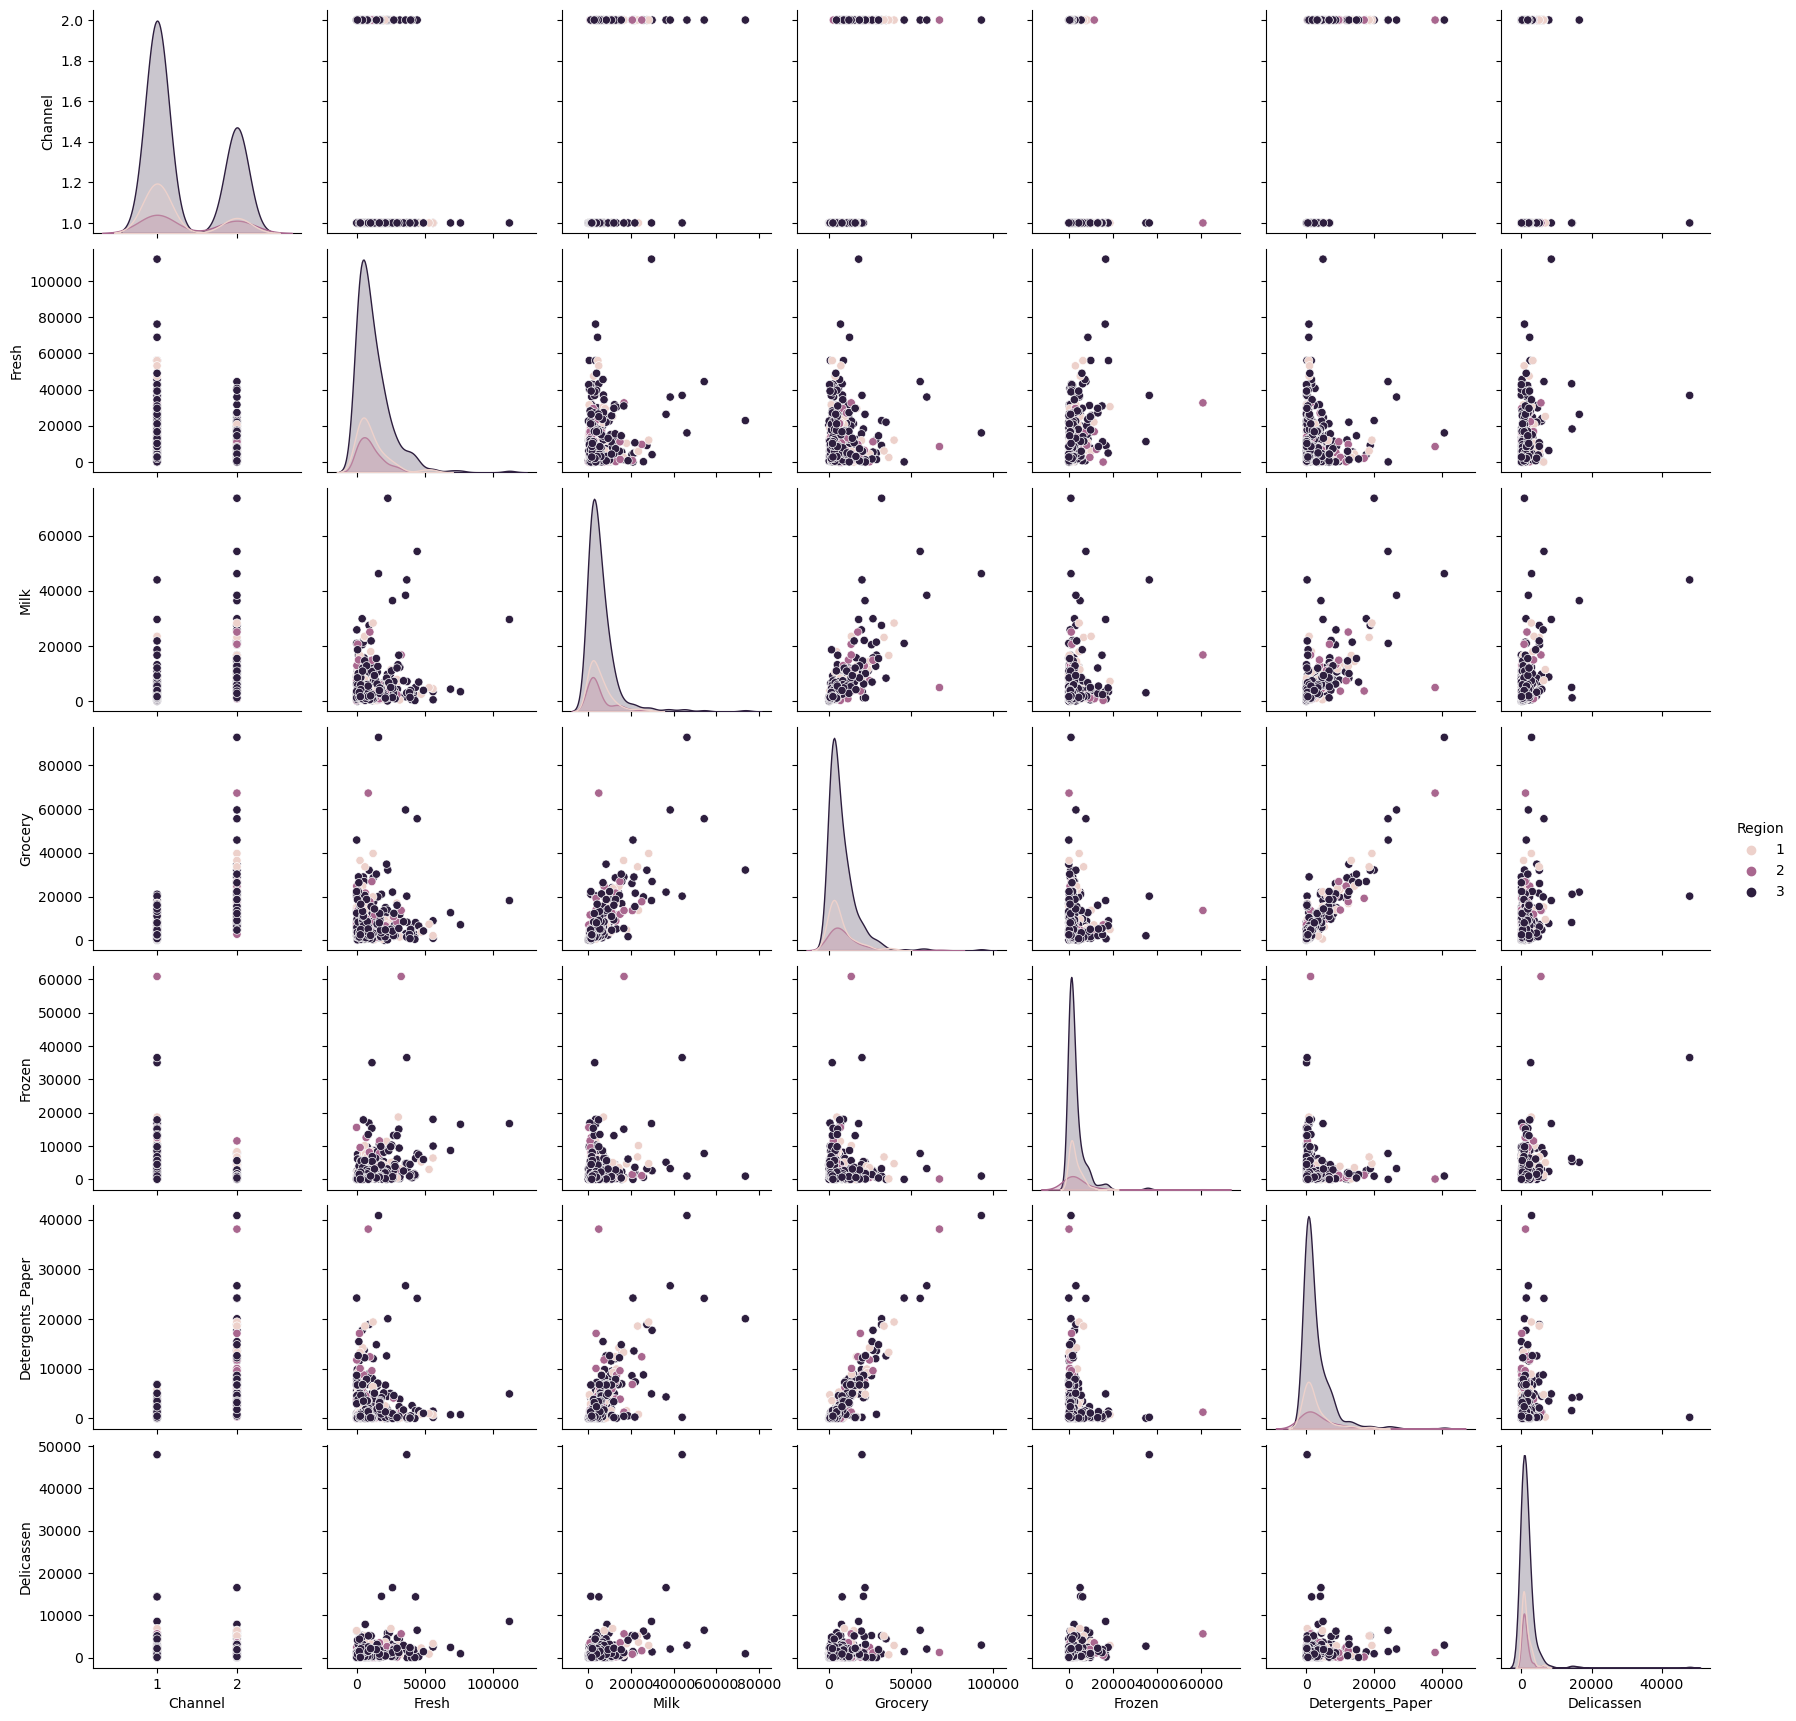

In [32]:
sns.pairplot(df,hue='Region')

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Clustering

# K-Means Clustering

In [33]:
from sklearn.cluster import KMeans

In [34]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
# n_clusters default value is 8 Here we use for loop with range(1,11)=So it will run upto 10
    km.fit_predict(df)
    wcss.append(km.inertia_)

# Inertia_ measures how well a dataset was clustered by K-Means.
# It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. 
# A good model is one with low inertia AND a low number of clusters ( K ).

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [35]:
wcss
# WCSS (Within-Cluster Sum of Square)

[157595857524.96133,
 113217528878.79837,
 80332414178.02908,
 64855545845.90141,
 53091562765.51762,
 46759761376.76043,
 41531260917.00964,
 36372480946.409485,
 32767103896.921555,
 30150608162.633484]

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# The Elbow Method

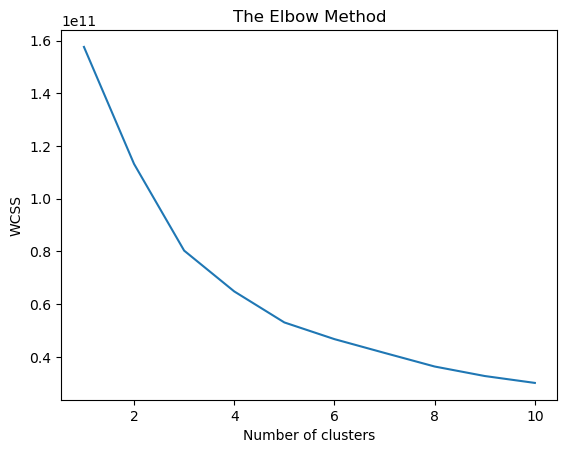

In [54]:
plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**If you observe the plot 6 is the point where it decrease so our K value we will take as 6**

In [51]:
kmeans = KMeans(n_clusters = 6)
               
y_kmeans = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


**Adding the cluster numbers to the dataset**

In [57]:
df_cluster = df
df_cluster['Cluster'] = y_kmeans
df_cluster.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,2


In [58]:
df_cluster.Cluster.value_counts()

Cluster
4    227
2    102
1     80
0     21
3      7
5      3
Name: count, dtype: int64

**Cluster visualization with Principal Component Analysis - PCA**

We cannot visualize our clusters that easily beacause our dataset is multidimentional. So we'll use the Principal Component Analysis to reduce our dataset to a two dimentional one, then add our identified clusters to visualize them.

**Feature Scaling**

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

**Applying PCA**

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pc = pca.fit_transform(df)
pc_df = pd.DataFrame(pc)
pc_df.columns = ['pc1','pc2']

In [64]:
pca_clustering = pd.concat([pc_df,df_cluster['Cluster']],axis=1)

**Visualizing our clusters on PCA axis**

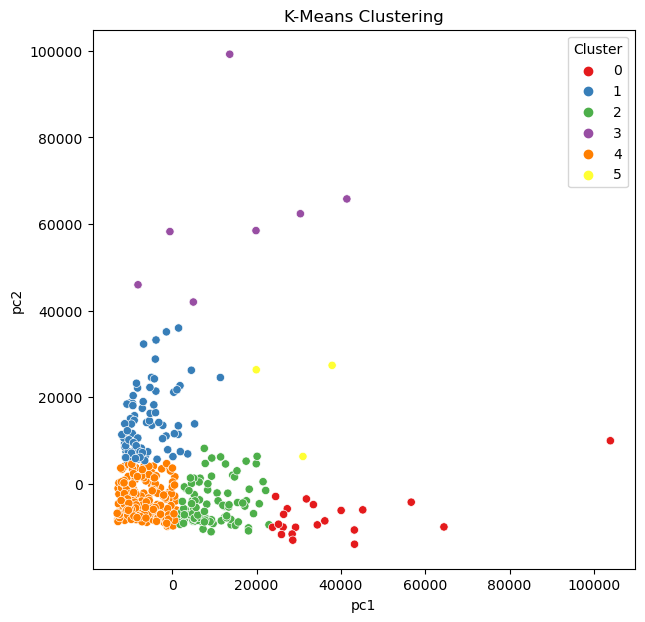

In [69]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Cluster', data=pca_clustering,palette='Set1').set_title('K-Means Clustering')
plt.show()

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Conclusion**

The K-Means clustering model allowed us to segments the customers between 6 distinct groups. We were able to visualize these clusters after performing a dimensionality reduction with the Principle Component Analysis.